In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, multilabel_confusion_matrix

In [18]:
dataset = pd.read_csv("iris.csv")

In [19]:
print("Dataset Summary:\n", dataset.describe())
print("\nFirst 5 rows:\n", dataset.head())
print("\nShape of dataset:", dataset.shape)

Dataset Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3  

In [6]:
X = dataset.iloc[:, :4].values  # All rows, first 4 columns
y = dataset["Species"].values # All rows, species column

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #feature scaling
X_test = sc.transform(X_test)

In [9]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y))
recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y))
f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y))

In [21]:
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


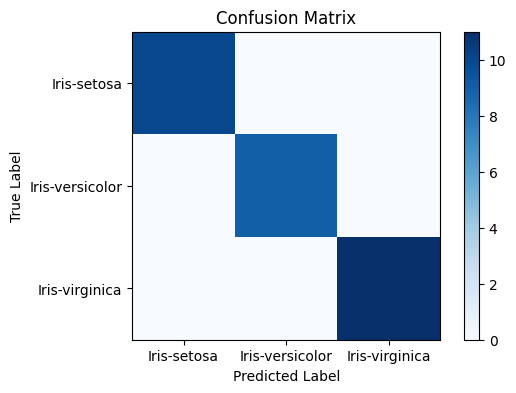

In [23]:
#optional
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
print("\nComparison of Actual vs Predicted:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


Comparison of Actual vs Predicted:
             Actual        Predicted
0   Iris-versicolor  Iris-versicolor
1       Iris-setosa      Iris-setosa
2    Iris-virginica   Iris-virginica
3   Iris-versicolor  Iris-versicolor
4   Iris-versicolor  Iris-versicolor
5       Iris-setosa      Iris-setosa
6   Iris-versicolor  Iris-versicolor
7    Iris-virginica   Iris-virginica
8   Iris-versicolor  Iris-versicolor
9   Iris-versicolor  Iris-versicolor
10   Iris-virginica   Iris-virginica
11      Iris-setosa      Iris-setosa
12      Iris-setosa      Iris-setosa
13      Iris-setosa      Iris-setosa
14      Iris-setosa      Iris-setosa
15  Iris-versicolor  Iris-versicolor
16   Iris-virginica   Iris-virginica
17  Iris-versicolor  Iris-versicolor
18  Iris-versicolor  Iris-versicolor
19   Iris-virginica   Iris-virginica
20      Iris-setosa      Iris-setosa
21   Iris-virginica   Iris-virginica
22      Iris-setosa      Iris-setosa
23   Iris-virginica   Iris-virginica
24   Iris-virginica   Iris-virginica
25

In [25]:
correct = np.sum(y_test == y_pred)
total = len(y_test)
print(f"\nConclusion: {correct} out of {total} predictions were correct.")


Conclusion: 30 out of 30 predictions were correct.
